In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch

from matplotlib import font_manager

plt.rcParams["font.family"] = "Andale Mono"

In [53]:
df = pd.read_csv('/Users/andylyford/Desktop/PROJECTS/Football/data/efl_championship_shots_07022022.csv', index_col = 0)

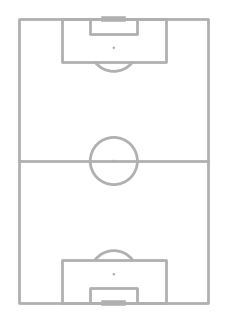

In [54]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)

pitch = VerticalPitch()

pitch.draw(ax = ax)

In [55]:
def soc_pitch_divisions(ax, grids = False):
    '''
    This function returns a vertical football pitch
    divided in specific locations.

    Args:
        ax (obj): a matplotlib axes.
        grids (bool): should we draw the grid lines?
    '''

    # Notice the extra parameters passed to the object
    pitch = VerticalPitch(
        pitch_type = "uefa",
        half = True,
        goal_type='box',
        linewidth = 1.25,
        line_color='black'
    )

    pitch.draw(ax = ax)

    # Where we'll draw the lines
    if grids:
        y_lines = [105 - 5.5*x for x in range(1,10)]
        x_lines = [68 - 6.8*x for x in range(1,10)]

        for i in x_lines:
            ax.plot(
                [i, i], [45, 105], 
                color = "lightgray", 
                ls = "--",
                lw = 0.75,
                zorder = -1
            )
        for j in y_lines:
            ax.plot(
                [68, 0], [j, j],
                color = "lightgray", 
                ls = "--",
                lw = 0.75,
                zorder = -1
            )

    return ax

<AxesSubplot:>

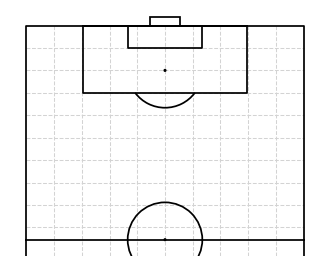

In [56]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)

soc_pitch_divisions(ax, grids = True)

In [57]:
# Keep only most recent season data
df = df[df["date"] >= "2021-08-06"].reset_index(drop = True)

# We need to invert our coordinates
df.rename(columns = {"x":"y", "y":"x"}, inplace = True)

# We define the cuts for our data (same as our pitch divisions)
# Only difference is we need to add the edges

y_bins = [105] + [105 - 5.5*x for x in range(1,10)] + [45]
x_bins = [68] + [68 - 6.8*x for x in range(1,10)] + [0]

x_bins.sort()
y_bins.sort()


In [58]:
df["bins_x"] = pd.cut(df["x"], bins = x_bins)

df["bins_y"] = pd.cut(df["y"], bins = y_bins)

#Group and sum xGOT by side and location
df_teams = (
    df.groupby(
        ["bins_x", "bins_y", "teamName", "teamId", "teamColor"], 
        observed = True
    )["xGOT"].sum()
    .reset_index()
)

# And we sort it based on the bins_y and bins_x columns
df_teams = (
    df_teams.
    sort_values(by = ["bins_y", "bins_x"]).
    reset_index(drop = True)
)

In [59]:
example_df = df_teams[df_teams["teamName"] == "Luton Town"]
total_example = example_df["xGOT"].sum()

# Compute share of xGOT as a % of total
example_df = (
    example_df
    .assign(xGOT_share = lambda x: x.xGOT/total_example)
)
# Scale data to the maximum value to get a nice color scale
example_df = (
    example_df
    .assign(xGOT_scaled = lambda x: x.xGOT_share/x.xGOT_share.max())
)

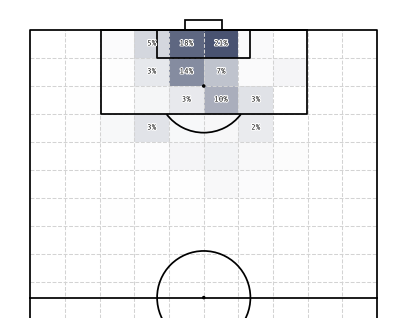

In [60]:
fig = plt.figure(figsize = (5,5), dpi = 100)
ax = plt.subplot(111)

soc_pitch_divisions(ax, grids = True)

counter = 0
for X, Y in zip(example_df["bins_x"], example_df["bins_y"]):
	#This colours our bins
    ax.fill_between(
        x = [X.left, X.right],
        y1 = Y.left,
        y2 = Y.right,
        color = "#495371",
        alpha = example_df["xGOT_scaled"].iloc[counter],
        zorder = -1,
        lw = 0
    )
	
    # Fancy annotations cuz why not?
    if example_df['xGOT_share'].iloc[counter] > .02:
        text_ = ax.annotate(
            xy = (X.right - (X.right - X.left)/2, Y.right - (Y.right - Y.left)/2),
            text = f"{example_df['xGOT_share'].iloc[counter]:.0%}",
            ha = "center",
            va = "center",
            color = "black",
            size = 5.5,
            weight = "bold",
            zorder = 3
        )

        text_.set_path_effects(
            [path_effects.Stroke(linewidth=1.5, foreground="white"), path_effects.Normal()]
        )

    counter += 1

In [61]:
example_df

,bins_x,bins_y,teamName,teamId,teamColor,xGOT,xGOT_share,xGOT_scaled
27,"(40.8, 47.6]","(61.0, 66.5]",Luton Town,8346,#002858,0.0000,0.000000,0.000000
33,"(13.6, 20.4]","(66.5, 72.0]",Luton Town,8346,#002858,0.0000,0.000000,0.000000
41,"(27.2, 34.0]","(66.5, 72.0]",Luton Town,8346,#002858,0.0000,0.000000,0.000000
52,"(34.0, 40.8]","(66.5, 72.0]",Luton Town,8346,#002858,0.0275,0.000477,0.002315
63,"(47.6, 54.4]","(66.5, 72.0]",Luton Town,8346,#002858,0.0273,0.000474,0.002298
94,"(20.4, 27.2]","(72.0, 77.5]",Luton Town,8346,#002858,0.2386,0.004139,0.020083
118,"(27.2, 34.0]","(72.0, 77.5]",Luton Town,8346,#002858,0.4157,0.007211,0.034990
142,"(34.0, 40.8]","(72.0, 77.5]",Luton Town,8346,#002858,0.0452,0.000784,0.003805
166,"(40.8, 47.6]","(72.0, 77.5]",Luton Town,8346,#002858,0.0000,0.000000,0.000000
213,"(13.6, 20.4]","(77.5, 83.0]",Luton Town,8346,#002858,0.1750,0.003036,0.014730


In [62]:
df_fk = pd.read_csv('data/JWP_FK.csv', index_col = 0)

df_fk = df_fk.reset_index(drop=True)

df_fk['bin_count'] = 1

df_fk

total_attempts = len(df_fk)

In [63]:
df_fk

,X,Y,result,xG,situation,shotType,h_team,a_team,h_a,Xi,Yi,bin_count
0,0.741,0.747,ShotOnPost,0.034644,DirectFreekick,RightFoot,Southampton,West Bromwich Albion,h,50.795998,77.804998,1
1,0.734,0.364,MissedShots,0.045185,DirectFreekick,RightFoot,Burnley,Southampton,a,24.752001,77.070002,1
2,0.806,0.396,MissedShots,0.112513,DirectFreekick,RightFoot,Queens Park Rangers,Southampton,a,26.927999,84.629998,1
3,0.775,0.445,MissedShots,0.085287,DirectFreekick,RightFoot,Everton,Southampton,a,30.260000,81.375000,1
4,0.735,0.526,SavedShot,0.054307,DirectFreekick,RightFoot,Southampton,Norwich,h,35.767999,77.175000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.816,0.507,BlockedShot,0.166058,DirectFreekick,RightFoot,Brentford,Southampton,a,34.476001,85.679998,1
96,0.729,0.626,BlockedShot,0.044070,DirectFreekick,RightFoot,Brentford,Southampton,a,42.567999,76.545002,1
97,0.720,0.649,BlockedShot,0.038546,DirectFreekick,RightFoot,Southampton,Liverpool,h,44.132001,75.600000,1
98,0.781,0.347,MissedShots,0.068748,DirectFreekick,RightFoot,Leicester,Southampton,a,23.596001,82.004998,1


In [64]:
df_fk["bins_x"] = pd.cut(df_fk["Xi"], bins = x_bins)

df_fk["bins_y"] = pd.cut(df_fk["Yi"], bins = y_bins)

#Group and sum xGOT by side and location
df_fk = (
    df_fk.groupby(
        ["bins_x", "bins_y"], 
        observed = True
    )['bin_count'].sum().reset_index()
)

df_fk

,bins_x,bins_y,bin_count
0,"(13.6, 20.4]","(77.5, 83.0]",2
1,"(13.6, 20.4]","(83.0, 88.5]",1
2,"(20.4, 27.2]","(72.0, 77.5]",5
3,"(20.4, 27.2]","(77.5, 83.0]",8
4,"(20.4, 27.2]","(83.0, 88.5]",2
5,"(27.2, 34.0]","(72.0, 77.5]",10
6,"(27.2, 34.0]","(77.5, 83.0]",3
7,"(27.2, 34.0]","(83.0, 88.5]",3
8,"(34.0, 40.8]","(72.0, 77.5]",6
9,"(34.0, 40.8]","(77.5, 83.0]",8


In [65]:


# Compute share of xGOT as a % of total
df_fk = (
    df_fk
    .assign(attempts_share = lambda x: x.bin_count/total_attempts)
)

df_fk


,bins_x,bins_y,bin_count,attempts_share
0,"(13.6, 20.4]","(77.5, 83.0]",2,0.02
1,"(13.6, 20.4]","(83.0, 88.5]",1,0.01
2,"(20.4, 27.2]","(72.0, 77.5]",5,0.05
3,"(20.4, 27.2]","(77.5, 83.0]",8,0.08
4,"(20.4, 27.2]","(83.0, 88.5]",2,0.02
5,"(27.2, 34.0]","(72.0, 77.5]",10,0.10
6,"(27.2, 34.0]","(77.5, 83.0]",3,0.03
7,"(27.2, 34.0]","(83.0, 88.5]",3,0.03
8,"(34.0, 40.8]","(72.0, 77.5]",6,0.06
9,"(34.0, 40.8]","(77.5, 83.0]",8,0.08


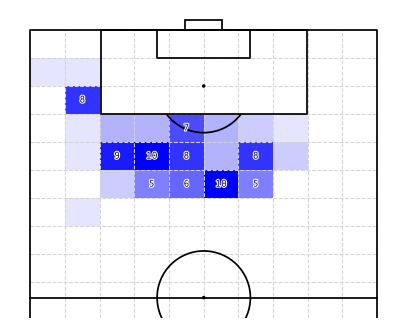

In [66]:
fig = plt.figure(figsize = (5,5), dpi = 100)
ax = plt.subplot(111)

soc_pitch_divisions(ax, grids = True)

counter = 0
for X, Y in zip(df_fk["bins_x"], df_fk["bins_y"]):
	#This colours our bins
    ax.fill_between(
        x = [X.left, X.right],
        y1 = Y.left,
        y2 = Y.right,
        color = "blue",
        zorder = -1,
        lw = 0,
        alpha = df_fk['attempts_share'].iloc[counter]*10
 
    )
    if df_fk['attempts_share'].iloc[counter] > .04:
        text_ = ax.annotate(
            xy = (X.right - (X.right - X.left)/2, Y.right - (Y.right - Y.left)/2),
            text = f"{df_fk['bin_count'].iloc[counter]}",
            ha = "center",
            va = "center",
            color = "black",
            size = 7,
            weight = "bold",
            zorder = 3
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=1.5, foreground="white"), path_effects.Normal()]
        )
	
    
    counter += 1